![](http://www.rasmussen.edu/-/media/images/blogs/college-life/2019/pros-and-cons-online-classes.png)

# The data analysis created by only Bangladesh data

In [193]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-classes-survey-bangladesh/EEE17BUET.csv


# 1. Importing nessesary libraries.

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
import matplotlib as mpl
import statistics as st
from itertools import chain
from operator import add
import re
import functools as func

In [195]:
df=pd.read_csv('/kaggle/input/online-classes-survey-bangladesh/EEE17BUET.csv')

In [196]:
df.shape

(189, 13)

In [197]:
df.isnull().sum()

Unnamed: 0           0
District             0
Upazila_Thana        0
Required_device      0
Broadband            0
two_month_net      112
Cellular           112
Net_speed          129
Hall                 0
Books               70
Class_System         0
Ct                   4
Comments           114
dtype: int64

In [198]:
df.head(5)

,Unnamed: 0,District,Upazila_Thana,Required_device,Broadband,two_month_net,Cellular,Net_speed,Hall,Books,Class_System,Ct,Comments
0,0,Gaibandha District,Sundargang,Yes,No,Yes,3G,2mbps,Resident,at hall,"Recorded Video Tutorials, Online Conference Pl...",Both of these as per requirement,NaN
1,1,Dhaka District,Shajahanpur,Yes,Yes,NaN,NaN,NaN,Attached,NaN,"Recorded Video Tutorials, Uploaded Lecture Not...",After resuming the offline classes,NaN
2,2,Tangail District,Tangail Sadar,Yes,Yes,NaN,NaN,NaN,Resident,at hall,"Recorded Video Tutorials, Online Conference Pl...",Both of these as per requirement,NaN
3,3,Kishoreganj District,Kishorganj Sadar,Yes,No,Yes,4G,NaN,Resident,at hall,Recorded Video Tutorials,After resuming the offline classes,NaN
4,4,Dhaka District,dhaka,Yes,Yes,NaN,NaN,NaN,Attached,NaN,"Recorded Video Tutorials, Uploaded Lecture Not...",After resuming the offline classes,NaN


****Sample number zilla wise->

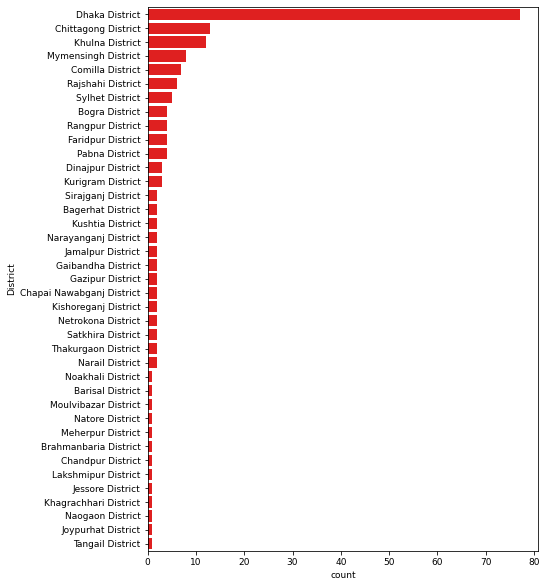

In [199]:
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y='District',data=df, color="r",
             order=df['District'].value_counts().index);

# 2. Sentiment analysis about online class->

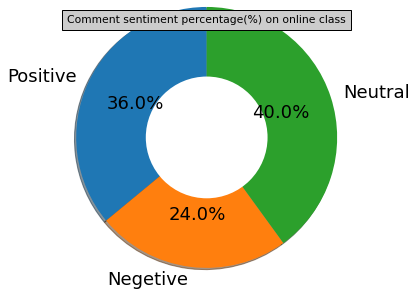

In [200]:
#Extracting data
class_system=df['Class_System']


#Prepare the commnets data
comment=pd.DataFrame(df['Comments'])
comment=pd.DataFrame(comment['Comments'])
comment=comment['Comments'].dropna()
comment=pd.DataFrame(comment)
comment.reset_index()
comment.shape


#Extracting the sentiment from commnet 
sentimentx=[]
x=0
for i in comment['Comments']:
    i=TextBlob(i)
    polarity=i.sentiment.polarity
    sentimentx.append(polarity)
    
    
#Put sentiment into commnets    
comment['sentiment']=sentimentx
    

    
#Sentiment amount count
positive=(comment['sentiment']>0).sum()
negetive=(comment['sentiment']<0).sum()
neutral=(comment['sentiment']==0).sum()





#Comments percentage(%) and Pie chart
fig1, ax1 = plt.subplots()
sentiment_amount=[positive,negetive,neutral];
plt.pie(sentiment_amount,labels=['Positive','Negetive','Neutral'], autopct='%1.1f%%',
        shadow=True, startangle=90,radius=1.5,textprops={'fontsize': 18});

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
plt.title('Comment sentiment percentage(%) on online class',bbox={'facecolor':'0.8', 'pad':5});
mpl.rcParams['font.size'] = 9.0

# 3.  Online class system type percentage->

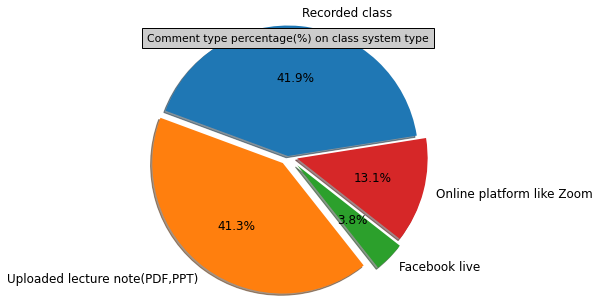

In [201]:
#Declear variable
recorded=0
online_platform=0
facebook_live=0
uploaded_lecture_note=0




#tokenizing the sentence into words
for sentence in class_system:
    token=nltk.word_tokenize(sentence)
    for i in token:
        if i=='Recorded':
            recorded+=1
        if i=='Online':
            online_platform+=1
        if i=='Uploaded':
            uploaded_lecture_note+=1
        if i=='Facebook':
            facebook_live+=1
            
   


#plot a pie chart for visulization           
class_sysytem_amount=[recorded,uploaded_lecture_note,facebook_live,online_platform];
plt.pie(class_sysytem_amount,labels=['Recorded class','Uploaded lecture note(PDF,PPT)','Facebook live','Online platform like Zoom'], autopct='%1.1f%%',
        shadow=True, startangle=9,radius=1.5,explode=[0,0.1,0.15,0.11],textprops={'fontsize': 12});
plt.title('Comment type percentage(%) on class system type',bbox={'facecolor':'0.8', 'pad':5});

# 4. Internet speed analysis->

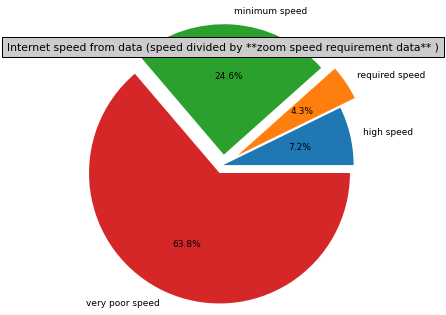

In [202]:
#Extracting data
net=df['Net_speed']
net_df=pd.DataFrame(net)
net_df=net_df.dropna()




#Extracting only number from string
speed=[]
for w in net_df['Net_speed']:
    numbers = re.findall('\d+',w) 
    speed.append(numbers)
    

    
#Appending the all list of internet speed together
big_list=[]  
big_list = func.reduce(add, speed)




#Turn the Kbps into Mbps
speed_list=[]
for i in big_list:
    integer=int(i)
    if integer>5:
        integer/=1000
    speed_list.append(integer)
    
    
    
       
#Make category of internet speed
high_speed=[]
required_speed=[]
minimum_speed=[]
very_poor=[]

for i in speed_list:
    if i>3:
        high_speed.append(i)
    if i>1.2 and i<3:
        required_speed.append(i)
    if i>0.6 and i<1.2:
        minimum_speed.append(i)
    if i<0.6:
        very_poor.append(i)
        

        
    
#Speed category length
high_amount=(len(high_speed))
required_amount=(len(required_speed))
minimum_amount=(len(minimum_speed))
very_poor_amount=(len(very_poor))



#Speed category value into list
internet_speed_list=[high_amount,required_amount,minimum_amount,very_poor_amount]



#Pie plot for visualization
plt.pie(internet_speed_list,labels=['high speed','required speed','minimum speed','very poor speed'],autopct='%1.1f%%',
       radius=1.5,explode=[0,0.2,0.12,0.1]);
plt.title('Internet speed from data (speed divided by **zoom speed requirement data** )',bbox={'facecolor':'0.8', 'pad':5});

# 5. Class test analysis->

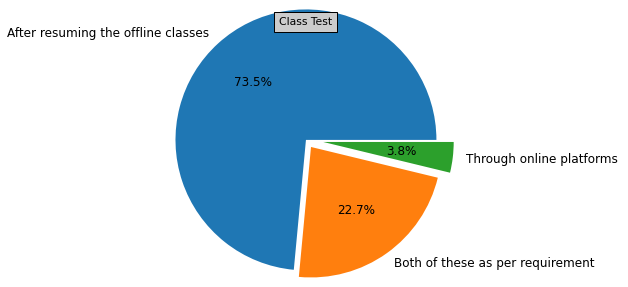

In [203]:
Ct=df['Ct'].value_counts()
plt.pie(Ct,autopct='%1.1f%%',labels=['After resuming the offline classes','Both of these as per requirement ','Through online platforms '],
       radius=1.5,textprops={'fontsize': 12},explode=[0,0.1,0.2]);
plt.title('Class Test',bbox={'facecolor':'0.8', 'pad':5});

# 6.Comments Sentiment Relationship 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


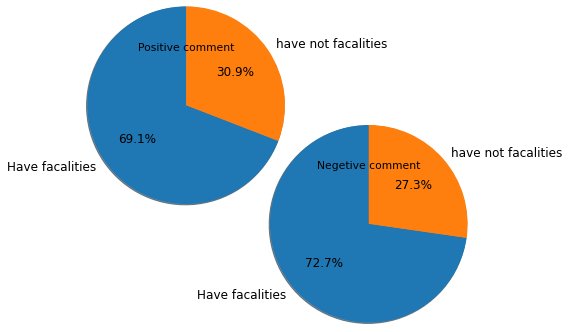

In [204]:
#Take comment type without nan value
fcr=df[df['Comments'].notna()]


#Put the sentiment analysis value, here no comments consider as positive sentiment
fcr['sentiment_type']=sentimentx


#Take necessary features for facalities count
fcr_1=fcr[['Required_device','Broadband','two_month_net','sentiment_type']]


#Divide postive and negetive sentiment
positive_rate=fcr_1[fcr_1['sentiment_type']>0.0]
negetive_rate=fcr_1[fcr_1['sentiment_type']<0.0]



#Features taken for count
features=['Required_device','Broadband','two_month_net']



#Features yes,no count function
def fcr_analysis(rate):
    t_yes=0
    t_no=0
    for i in features:
        yes,no=rate[i].value_counts()
        t_yes+=yes
        t_no+=no
    return t_yes,t_no


#yes,no count for positive and negetive count
p_yes,p_no=fcr_analysis(positive_rate)
n_yes,n_no=fcr_analysis(negetive_rate)


#yes,no count take in one variable for pie chart
t1=p_yes,p_no
t2=n_yes,n_no




#pie chart
plt.subplot(2,2,1)
plt.title('Positive comment')
plt.pie(t1, labels=['Have facalities','have not facalities'],autopct='%1.1f%%',
        shadow=True, startangle=90,radius=2.5,textprops={'fontsize': 12});
plt.subplot(2,2,4)
plt.title('Negetive comment')
plt.pie(t2, labels=['Have facalities','have not facalities'], autopct='%1.1f%%',
        shadow=True, startangle=90,radius=2.5,textprops={'fontsize': 12});

* Here a interesting facts found that those who give negetive comments have more facalities than who give positive comments

# 7. Country wise facalities->

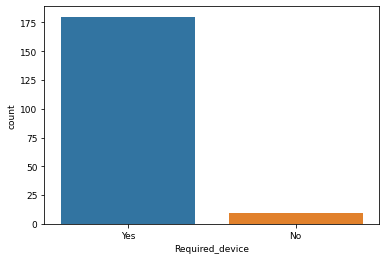

In [205]:
sns.countplot(df['Required_device']);

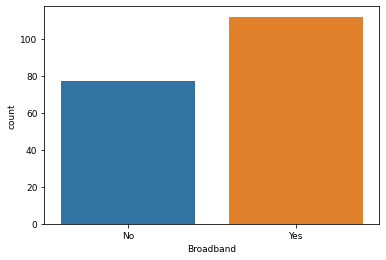

In [206]:
sns.countplot(df['Broadband']);

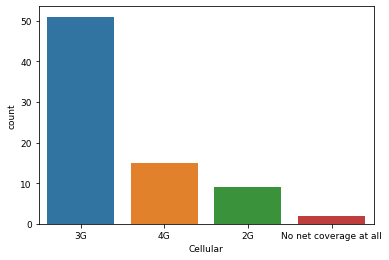

In [207]:
sns.countplot(df['Cellular']);

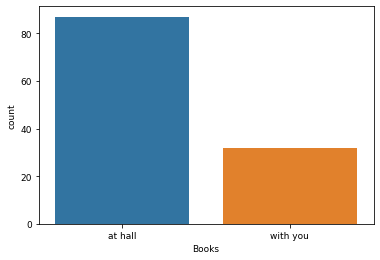

In [208]:
sns.countplot(df['Books']);

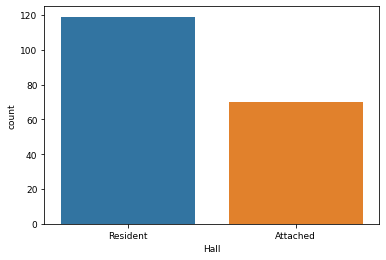

In [209]:
sns.countplot(df['Hall']);

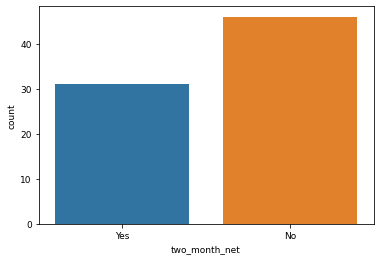

In [210]:
sns.countplot(df['two_month_net']);

# 8. Facalities on Big Cities VS Small Town->

In [211]:
#Big cities data
Dhaka=df[df['District']=='Dhaka District']
Chittagong=df[df['District']=='Chittagong District']
Khulna=df[df['District']=='Khulna District']


#Small town data extracting by drop big cities data
df_town=df.drop(Dhaka.index,axis=0)
df_town=df_town.drop(Chittagong.index,axis=0)
df_town=df_town.drop(Khulna.index,axis=0)

In [212]:
df_cities=df[df["District"].isin(["Dhaka District", "Chittagong District", "Khulna District"])]
df_cities['District'].unique()

array(['Dhaka District', 'Chittagong District', 'Khulna District'],
      dtype=object)

Facality difference between Cities and Town

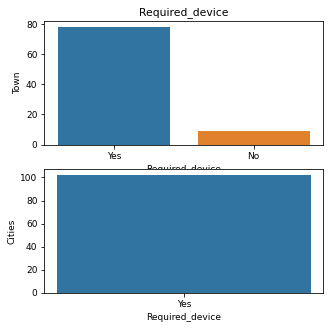

In [213]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.countplot(df_town['Required_device'])
plt.title('Required_device')
plt.ylabel('Town')

plt.subplot(2, 1, 2)
sns.countplot(df_cities['Required_device'])
plt.ylabel('Cities')

plt.show()

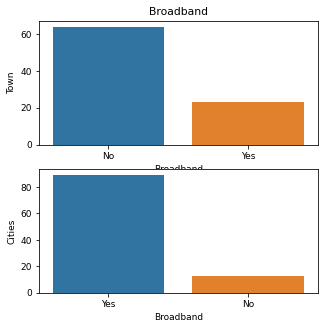

In [214]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.countplot(df_town['Broadband'])
plt.title('Broadband')
plt.ylabel('Town')

plt.subplot(2, 1, 2)
sns.countplot(df_cities['Broadband'])
plt.ylabel('Cities')

plt.show()

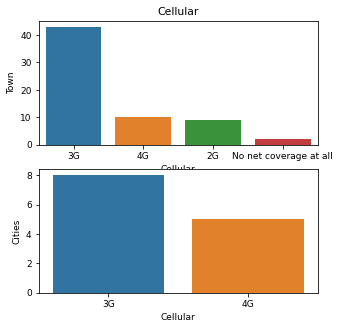

In [215]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.countplot(df_town['Cellular'])
plt.title('Cellular')
plt.ylabel('Town')

plt.subplot(2, 1, 2)
sns.countplot(df_cities['Cellular'])
plt.ylabel('Cities')

plt.show()

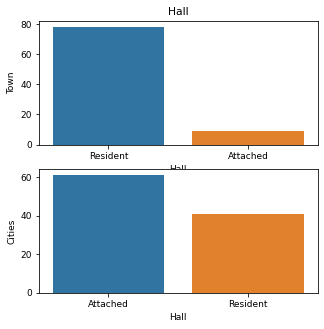

In [216]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.countplot(df_town['Hall'])
plt.title('Hall')
plt.ylabel('Town')

plt.subplot(2, 1, 2)
sns.countplot(df_cities['Hall'])
plt.ylabel('Cities')

plt.show()

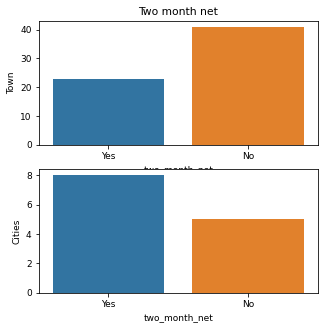

In [217]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
sns.countplot(df_town['two_month_net'])
plt.title('Two month net')
plt.ylabel('Town')

plt.subplot(2, 1, 2)
sns.countplot(df_cities['two_month_net'])
plt.ylabel('Cities')

plt.show()

# Thank you....If you like this kernel please upvote